In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif,RFE
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [2]:
''' 
Primary Goal: To predict the outcome of horse races 
(e.g., win or place)
Secondary Goals:
To identify significant features affecting race outcomes.
To create a robust prediction model using historical data.

'''

' \nPrimary Goal: To predict the outcome of horse races \n(e.g., win or place)\nSecondary Goals:\nTo identify significant features affecting race outcomes.\nTo create a robust prediction model using historical data.\n\n'

In [3]:
import pandas as pd
import os

#specify the directory where your csv files are located
csv_horses=r"D:\horse race prediction\Horses"

#list all CSV files in the direcory
csv_files=[file for file in os.listdir(csv_horses) if file.endswith('.csv')]


#read each CSV file and concatenate them into a single DataFrame
df_list=[pd.read_csv(os.path.join(csv_horses,file), low_memory=False) for file in csv_files]
combined_df_horses=pd.concat(df_list,ignore_index=True)

In [4]:
combined_df_horses

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,OR,father,mother,gfather,runners,margin,weight,res_win,res_place,price
0,271018,Combermere,6.0,0.0,0.222222,0,R G Frost,J Frost,1,NaN,...,NaN,Absalom,Queen's Parade,Sovereign Path,14,1.521003,69,1.0,1.0,NaN
1,271018,Royal Battery,6.0,0.0,0.090909,0,D H Barons,S Earle,2,10,...,NaN,Norfolk Air,All At Sea,Man The Rail,14,1.521003,69,0.0,1.0,NaN
2,271018,Just So,7.0,0.0,0.029412,0,J D Roberts,S Burrough,3,15,...,NaN,Sousa,Just Camilla,Ascertain I,14,1.521003,66,0.0,1.0,NaN
3,271018,Mandraki Shuffle,8.0,0.0,0.090909,0,Oliver Sherwood,M Richards,4,20,...,NaN,Mandalus,Indictment,Desert Call,14,1.521003,69,0.0,0.0,NaN
4,271018,Turnberry Dawn,8.0,0.0,0.047619,0,T B Hallett,P Richards,5,dist,...,NaN,Fair Turn,Shuil Alainn,Levanter,14,1.521003,69,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4107310,415090,Beefeater,8.0,6.0,0.030303,0,Roydon Bergerson,Hazel Schofer,7,shd,...,NaN,Alamosa,Karaka,Kings Island II,11,1.191591,58,0.0,0.0,32/1
4107311,415090,Aimee's Jewel,4.0,11.0,0.153846,0,Trudy Keegan,Lisa Allpress,8,.5,...,NaN,Proisir,Aimee's Idol,Colombia,11,1.191591,57,0.0,0.0,11/2
4107312,415090,Times Ticking,5.0,8.0,0.044053,0,Alby Macgregor,Jonathan Riddell,9,hd,...,NaN,Tavistock,Laoghaire,Pins,11,1.191591,58,0.0,0.0,217/10
4107313,415090,Shadows Cast,8.0,3.0,0.041152,0,Mark Oulaghan,Johnathan Parkes,10,1,...,NaN,Per Incanto,Ages Past,Slavic,11,1.191591,58,0.0,0.0,233/10


In [5]:
combined_df_horses['res_win'].value_counts()

res_win
0.0    3711478
1.0     395837
Name: count, dtype: int64

In [6]:
combined_df_horses['res_win'].dtype

dtype('float64')

In [7]:
combined_df_horses.columns

Index(['rid', 'horseName', 'age', 'saddle', 'decimalPrice', 'isFav',
       'trainerName', 'jockeyName', 'position', 'positionL', 'dist',
       'weightSt', 'weightLb', 'overWeight', 'outHandicap', 'headGear', 'RPR',
       'TR', 'OR', 'father', 'mother', 'gfather', 'runners', 'margin',
       'weight', 'res_win', 'res_place', 'price'],
      dtype='object')

In [8]:
import pandas as pd
import os

#specify the directory where your csv files are located
csv_races=r"D:\horse race prediction\Races"

#list all CSV files in the direcory
csv_files=[file for file in os.listdir(csv_races) if file.endswith('.csv')]


#read each CSV file and concatenate them into a single DataFrame
df_list=[pd.read_csv(os.path.join(csv_races,file), low_memory=False) for file in csv_files]
combined_df_races=pd.concat(df_list,ignore_index=True)

In [9]:
combined_df_races.head(2)

,rid,course,time,date,title,rclass,band,ages,distance,condition,hurdles,prizes,winningTime,prize,metric,countryCode,ncond,class,currency
0,271018,Exeter,03:15,90/01/01,David Garrett Memorial Challenge Trophy Novice...,NaN,NaN,6-8yo,3m1f,Soft,19 fences,"[2922.5, 875.0, 420.0, 192.5]",398.3,4409.0,5028.0,GB,5,0,NaN
1,275156,Tramore (IRE),02:00,90/01/01,Tattersalls Mares E.B.F. Novice Chase,NaN,NaN,NaN,2m,Soft,12 fences,[],267.0,NaN,3218.0,IE,5,0,NaN


In [10]:
combined_df_horses.head(2)

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,OR,father,mother,gfather,runners,margin,weight,res_win,res_place,price
0,271018,Combermere,6.0,0.0,0.222222,0,R G Frost,J Frost,1,NaN,...,NaN,Absalom,Queen's Parade,Sovereign Path,14,1.521003,69,1.0,1.0,NaN
1,271018,Royal Battery,6.0,0.0,0.090909,0,D H Barons,S Earle,2,10,...,NaN,Norfolk Air,All At Sea,Man The Rail,14,1.521003,69,0.0,1.0,NaN


In [11]:
combined_df_races.columns

Index(['rid', 'course', 'time', 'date', 'title', 'rclass', 'band', 'ages',
       'distance', 'condition', 'hurdles', 'prizes', 'winningTime', 'prize',
       'metric', 'countryCode', 'ncond', 'class', 'currency'],
      dtype='object')

In [12]:
combined_df_horses.columns

Index(['rid', 'horseName', 'age', 'saddle', 'decimalPrice', 'isFav',
       'trainerName', 'jockeyName', 'position', 'positionL', 'dist',
       'weightSt', 'weightLb', 'overWeight', 'outHandicap', 'headGear', 'RPR',
       'TR', 'OR', 'father', 'mother', 'gfather', 'runners', 'margin',
       'weight', 'res_win', 'res_place', 'price'],
      dtype='object')

In [13]:
#merge dataframes on 'rid'  Race ID
combined_df=pd.merge(combined_df_races,combined_df_horses,on='rid')

combined_df

,rid,course,time,date,title,rclass,band,ages,distance,condition,...,OR,father,mother,gfather,runners,margin,weight,res_win,res_place,price
0,271018,Exeter,03:15,90/01/01,David Garrett Memorial Challenge Trophy Novice...,NaN,NaN,6-8yo,3m1f,Soft,...,NaN,Absalom,Queen's Parade,Sovereign Path,14,1.521003,69,1.0,1.0,NaN
1,271018,Exeter,03:15,90/01/01,David Garrett Memorial Challenge Trophy Novice...,NaN,NaN,6-8yo,3m1f,Soft,...,NaN,Norfolk Air,All At Sea,Man The Rail,14,1.521003,69,0.0,1.0,NaN
2,271018,Exeter,03:15,90/01/01,David Garrett Memorial Challenge Trophy Novice...,NaN,NaN,6-8yo,3m1f,Soft,...,NaN,Sousa,Just Camilla,Ascertain I,14,1.521003,66,0.0,1.0,NaN
3,271018,Exeter,03:15,90/01/01,David Garrett Memorial Challenge Trophy Novice...,NaN,NaN,6-8yo,3m1f,Soft,...,NaN,Mandalus,Indictment,Desert Call,14,1.521003,69,0.0,0.0,NaN
4,271018,Exeter,03:15,90/01/01,David Garrett Memorial Challenge Trophy Novice...,NaN,NaN,6-8yo,3m1f,Soft,...,NaN,Fair Turn,Shuil Alainn,Levanter,14,1.521003,69,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4107310,415090,Trentham (NZ),03:45,20/12/05 00:00,Rydges Wellington Captain Cook Stakes (Group 1...,NaN,NaN,2yo+,1m,Soft,...,NaN,Alamosa,Karaka,Kings Island II,11,1.191591,58,0.0,0.0,32/1
4107311,415090,Trentham (NZ),03:45,20/12/05 00:00,Rydges Wellington Captain Cook Stakes (Group 1...,NaN,NaN,2yo+,1m,Soft,...,NaN,Proisir,Aimee's Idol,Colombia,11,1.191591,57,0.0,0.0,11/2
4107312,415090,Trentham (NZ),03:45,20/12/05 00:00,Rydges Wellington Captain Cook Stakes (Group 1...,NaN,NaN,2yo+,1m,Soft,...,NaN,Tavistock,Laoghaire,Pins,11,1.191591,58,0.0,0.0,217/10
4107313,415090,Trentham (NZ),03:45,20/12/05 00:00,Rydges Wellington Captain Cook Stakes (Group 1...,NaN,NaN,2yo+,1m,Soft,...,NaN,Per Incanto,Ages Past,Slavic,11,1.191591,58,0.0,0.0,233/10


Column	Description
rid	Race ID
horseName	Horse name
age	Horse age
saddle	Saddle # where horse starts
decimalPrice	1/Decimal price
isFav	Was horse favorite before start?
trainerName	Trainer name
jockeyName	Jockey name
position	Finishing position (40 if horse didn't finish)
positionL	How far a horse has finished from the pursued horse
dist	How far a horse has finished from a winner
weightSt	Horse weight in St
weightLb	Horse weight in Lb
overWeight	Overweight code
outHandicap	Handicap
headGear	Head gear code
RPR	RP Rating
TR	Topspeed
OR	Official Rating
father	Horse's Father name
mother	Horse's Mother name
gfather	Horse's Grandfather name
runners	Runners total
margin	Sum of decimal prices for the race
weight	Horse weight in kg
res_win	Horse won or not
res_place	Horse placed or not

In [14]:
combined_df

,rid,course,time,date,title,rclass,band,ages,distance,condition,...,OR,father,mother,gfather,runners,margin,weight,res_win,res_place,price
0,271018,Exeter,03:15,90/01/01,David Garrett Memorial Challenge Trophy Novice...,NaN,NaN,6-8yo,3m1f,Soft,...,NaN,Absalom,Queen's Parade,Sovereign Path,14,1.521003,69,1.0,1.0,NaN
1,271018,Exeter,03:15,90/01/01,David Garrett Memorial Challenge Trophy Novice...,NaN,NaN,6-8yo,3m1f,Soft,...,NaN,Norfolk Air,All At Sea,Man The Rail,14,1.521003,69,0.0,1.0,NaN
2,271018,Exeter,03:15,90/01/01,David Garrett Memorial Challenge Trophy Novice...,NaN,NaN,6-8yo,3m1f,Soft,...,NaN,Sousa,Just Camilla,Ascertain I,14,1.521003,66,0.0,1.0,NaN
3,271018,Exeter,03:15,90/01/01,David Garrett Memorial Challenge Trophy Novice...,NaN,NaN,6-8yo,3m1f,Soft,...,NaN,Mandalus,Indictment,Desert Call,14,1.521003,69,0.0,0.0,NaN
4,271018,Exeter,03:15,90/01/01,David Garrett Memorial Challenge Trophy Novice...,NaN,NaN,6-8yo,3m1f,Soft,...,NaN,Fair Turn,Shuil Alainn,Levanter,14,1.521003,69,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4107310,415090,Trentham (NZ),03:45,20/12/05 00:00,Rydges Wellington Captain Cook Stakes (Group 1...,NaN,NaN,2yo+,1m,Soft,...,NaN,Alamosa,Karaka,Kings Island II,11,1.191591,58,0.0,0.0,32/1
4107311,415090,Trentham (NZ),03:45,20/12/05 00:00,Rydges Wellington Captain Cook Stakes (Group 1...,NaN,NaN,2yo+,1m,Soft,...,NaN,Proisir,Aimee's Idol,Colombia,11,1.191591,57,0.0,0.0,11/2
4107312,415090,Trentham (NZ),03:45,20/12/05 00:00,Rydges Wellington Captain Cook Stakes (Group 1...,NaN,NaN,2yo+,1m,Soft,...,NaN,Tavistock,Laoghaire,Pins,11,1.191591,58,0.0,0.0,217/10
4107313,415090,Trentham (NZ),03:45,20/12/05 00:00,Rydges Wellington Captain Cook Stakes (Group 1...,NaN,NaN,2yo+,1m,Soft,...,NaN,Per Incanto,Ages Past,Slavic,11,1.191591,58,0.0,0.0,233/10


In [15]:
combined_df.isnull().sum()

rid                   0
course                0
time                  0
date                  0
title                 7
rclass          1717422
band            2379862
ages             143485
distance              0
condition           404
hurdles         2880705
prizes                0
winningTime           0
prize            235284
metric                0
countryCode           0
ncond                 0
class                 0
currency        4012304
horseName             0
age                 309
saddle           179168
decimalPrice          0
isFav                 0
trainerName        2850
jockeyName          125
position              0
positionL        783662
dist            1074385
weightSt              0
weightLb              0
overWeight      4012988
outHandicap     3994332
headGear        3119695
RPR              864877
TR              1681610
OR              1795263
father             1289
mother             4480
gfather          119374
runners               0
margin          

In [16]:
''' 
out of 4107315 rows,

null values

rclass          1717422
band            2379862
ages             143485
condition           404
hurdles         2880705
prize            235284
currency        4012304
age                 309
saddle           179168
trainerName        2850
jockeyName          125
positionL        783662 How far a horse has finished from the pursued horse
dist            1074385 How far a horse has finished from a winner
overWeight      4012988 Overweight code
outHandicap     3994332 Handicap
headGear        3119695 Head gear code
RPR              864877 RP Rating
TR              1681610 Topspeed
OR              1795263 Official Rating
father             1289
mother             4480
gfather          119374
price           4012304

'''

' \nout of 4107315 rows,\n\nnull values\n\nrclass          1717422\nband            2379862\nages             143485\ncondition           404\nhurdles         2880705\nprize            235284\ncurrency        4012304\nage                 309\nsaddle           179168\ntrainerName        2850\njockeyName          125\npositionL        783662 How far a horse has finished from the pursued horse\ndist            1074385 How far a horse has finished from a winner\noverWeight      4012988 Overweight code\noutHandicap     3994332 Handicap\nheadGear        3119695 Head gear code\nRPR              864877 RP Rating\nTR              1681610 Topspeed\nOR              1795263 Official Rating\nfather             1289\nmother             4480\ngfather          119374\nprice           4012304\n\n'

In [17]:
combined_df.head(2).T

,0,1
rid,271018,271018
course,Exeter,Exeter
time,03:15,03:15
date,90/01/01,90/01/01
title,David Garrett Memorial Challenge Trophy Novice...,David Garrett Memorial Challenge Trophy Novice...
rclass,NaN,NaN
band,NaN,NaN
ages,6-8yo,6-8yo
distance,3m1f,3m1f
condition,Soft,Soft


In [18]:
combined_df.dtypes

rid               int64
course           object
time             object
date             object
title            object
rclass           object
band             object
ages             object
distance         object
condition        object
hurdles          object
prizes           object
winningTime     float64
prize           float64
metric          float64
countryCode      object
ncond            object
class             int64
currency         object
horseName        object
age             float64
saddle          float64
decimalPrice    float64
isFav             int64
trainerName      object
jockeyName       object
position          int64
positionL        object
dist             object
weightSt          int64
weightLb          int64
overWeight      float64
outHandicap     float64
headGear         object
RPR             float64
TR              float64
OR              float64
father           object
mother           object
gfather          object
runners           int64
margin          

In [19]:
#drop columns with excessive missing values (e.g., more than 50% missing)
columns_to_drop=['rclass','band','hurdles','currency','overWeight','outHandicap','headGear','price']
combined_df.drop(columns=columns_to_drop,inplace=True)


In [20]:
#fill missing values with appropriate methods
combined_df['title']=combined_df['title'].fillna('Unknown')
combined_df['ages']=combined_df['ages'].fillna('Unknown')
combined_df['condition']=combined_df['condition'].fillna('Unknown')
combined_df['trainerName']=combined_df['trainerName'].fillna('Unknown')
combined_df['jockeyName']=combined_df['jockeyName'].fillna('Unknown')
combined_df['dist']=combined_df['dist'].fillna('Unknown')
combined_df['positionL']=combined_df['positionL'].fillna('Unknown')

#fill missing values in numerical columns with median
numerical_columns_with_na=['prize','age','saddle','RPR','TR','OR']
combined_df[numerical_columns_with_na]=combined_df[numerical_columns_with_na].fillna(combined_df[numerical_columns_with_na].median())

#drop rows with remaining values
combined_df.dropna(inplace=True)

In [21]:
combined_df.isnull().sum().sum()

0

In [22]:
#create performance metrics
combined_df['performance_metric']=combined_df['position']/combined_df['runners']
#position-Finishing position (40 if horse didn't finish)
#runners-Runners total

#create average weight of horses in previous races
combined_df['avg_weight']=combined_df.groupby('horseName')['weight'].transform('mean')
#all rows with the same horse name will be grouped together
#transform function calculates the mean of the weight for 
# each group (each horse).

# create a feature for the number of races a horse has participated in
combined_df['num_races']=combined_df.groupby('horseName')['rid'].transform('count')
# calculates the number of races each horse has participated in

#create lag features for horse performance
combined_df['lag_performance']=combined_df.groupby('horseName')['performance_metric'].shift(1)
combined_df['lag_weight']=combined_df.groupby('horseName')['weight'].shift(1)
#  creates lagged versions of these columns, showing the 
# performance metric and weight from the previous race for 
# each horse.  lagged columns are useful for time series analysis, 
# as they provide information about a horse's performance and 
# weight in the previous race, which can be used to model and 
# predict future performance.

#fill missing lag values with the median of the respective columns
combined_df['lag_performance']=combined_df['lag_performance'].fillna(combined_df['lag_performance'].median())
combined_df['lag_weight']=combined_df['lag_weight'].fillna(combined_df['lag_weight'].median())
# ensures that the missing values are replaced with a central 
# value that is not affected by extreme values, making the data 
# more suitable for further analysis and modeling.

In [23]:
combined_df.head(2)

,rid,course,time,date,title,ages,distance,condition,prizes,winningTime,...,runners,margin,weight,res_win,res_place,performance_metric,avg_weight,num_races,lag_performance,lag_weight
0,271018,Exeter,03:15,90/01/01,David Garrett Memorial Challenge Trophy Novice...,6-8yo,3m1f,Soft,"[2922.5, 875.0, 420.0, 192.5]",398.3,...,14,1.521003,69,1.0,1.0,0.071429,65.275862,29,0.52,59.0
1,271018,Exeter,03:15,90/01/01,David Garrett Memorial Challenge Trophy Novice...,6-8yo,3m1f,Soft,"[2922.5, 875.0, 420.0, 192.5]",398.3,...,14,1.521003,69,0.0,1.0,0.142857,67.920000,25,0.52,59.0


In [24]:
combined_df1=combined_df.copy()

In [25]:
#aggregate features for each horse
horse_aggregates=combined_df.groupby('horseName').agg({
    'position':['mean','std'],
    'weight':['mean','std'],
    'decimalPrice':['mean','std'],
    'RPR':['mean','std'],
    'TR':['mean','std'],
    'OR':['mean','std']
}).reset_index()

#RP Rating
#Topspeed
#Official Rating
#groupby('horseName') method groups the DataFrame by the horseName column
# .agg() method is used to compute various statistics for each group
# reset_index() method is used to convert the grouped index 
# (horseName) back to a regular column in the resulting DataFrame 
# horse_aggregates.

#flatten the multi level column names
horse_aggregates.columns=['_'.join(col).strip() for col in horse_aggregates.columns.values]
#The aggregation creates multi-level column names (e.g., 
# ('position', 'mean'), ('position', 'std')).
#A list comprehension is used to join the levels of each column 
# name with an underscore (_), resulting in single-level column 
# names like position_mean, position_std, etc.

#merge aggregated features back to the combined dataframe
combined_df=combined_df.merge(horse_aggregates,left_on='horseName',right_on='horseName_')
combined_df.drop(['horseName_'],axis=1,inplace=True)
#The left_on='horseName' and right_on='horseName_' parameters 
# indicate that the merging should be done on the horseName 
# column from combined_df and the horseName_ column from 
# horse_aggregates.

In [26]:
#summary statistics
combined_df.describe().T

,count,mean,std,min,25%,50%,75%,max
rid,3987941.0,207462.510967,119925.133574,0.000000,103663.000000,207281.000000,311350.000000,4.150900e+05
winningTime,3987941.0,178.364588,104.263981,0.000000,89.290000,134.920000,255.900000,5.552530e+03
prize,3987941.0,30475.417087,140794.868039,1.000000,4430.000000,6926.000000,14728.000000,1.503760e+07
metric,3987941.0,2517.564154,1216.941101,804.000000,1407.000000,2111.500000,3318.500000,7.340500e+03
class,3987941.0,2.595419,2.369900,0.000000,0.000000,3.000000,5.000000,7.000000e+00
age,3987941.0,4.944762,2.257205,-17.000000,3.000000,5.000000,6.000000,2.700000e+01
saddle,3987941.0,5.842572,4.722426,0.000000,2.000000,5.000000,9.000000,4.000000e+01
decimalPrice,3987941.0,0.117479,0.114105,0.000799,0.038462,0.076923,0.153846,9.900990e-01
isFav,3987941.0,0.104952,0.306491,0.000000,0.000000,0.000000,0.000000,1.000000e+00
position,3987941.0,8.582565,9.564135,0.000000,3.000000,6.000000,10.000000,4.000000e+01


In [27]:
combined_df.describe(include=['object']) #describe categorical variables

,course,time,date,title,ages,distance,condition,prizes,countryCode,ncond,horseName,trainerName,jockeyName,positionL,dist,father,mother,gfather
count,3987941,3987941,3987941,3987941,3987941,3987941,3987941,3987941,3987941,3987941,3987941,3987941,3987941,3987941,3987941,3987941,3987941,3987941
unique,440,717,11005,236149,29,65,23,54152,34,41,360124,18167,17336,262,1183,10674,152564,11194
top,Wolverhampton (AW),02:30,91/04/01,Irish Stallion Farms European Breeders Fund Fi...,4yo+,2m,Good,[],GB,1,Dvinsky,Mark Johnston,Joe Fanning,Unknown,Unknown,Presenting,Silk St James,Sadler's Wells
freq,143486,104047,1241,5084,1156520,445743,1017009,231643,2580412,722979,230,30649,21644,770816,1053394,20275,529,41840


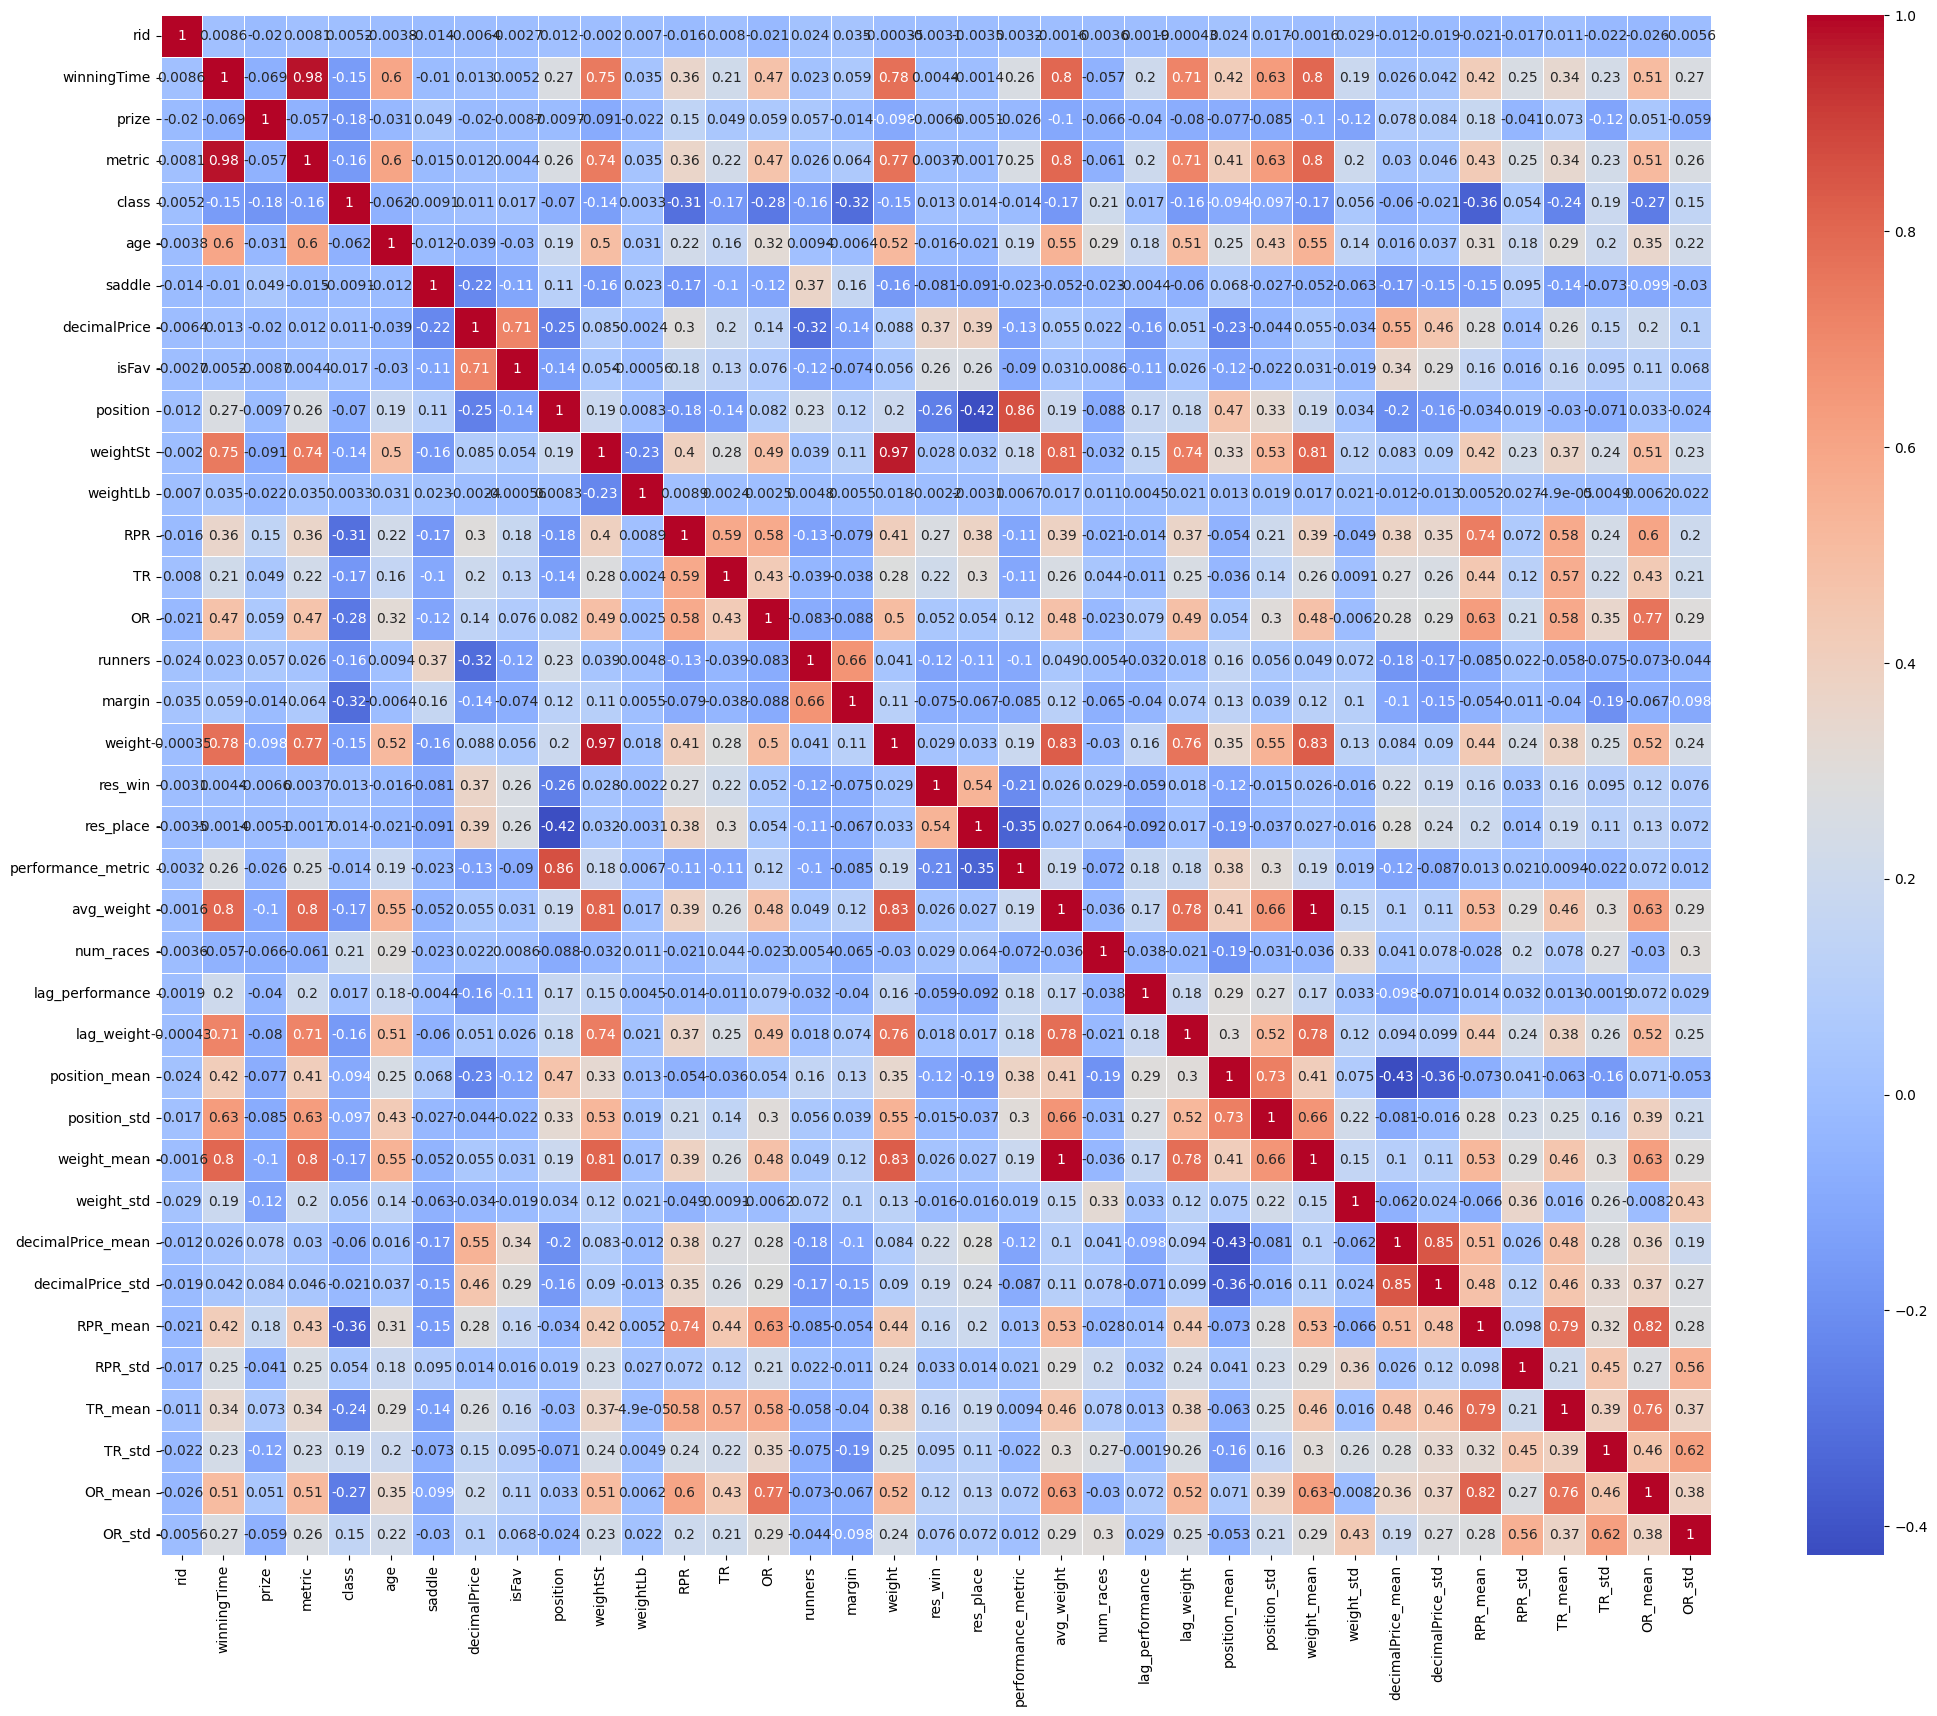

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

#select only numeric columns
numeric_columns=combined_df.select_dtypes(include=['number']).columns
corr_matrix=combined_df[numeric_columns].corr()

plt.figure(figsize=(25,20))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',linewidths=0.5)
plt.show()

In [29]:
combined_df.columns

Index(['rid', 'course', 'time', 'date', 'title', 'ages', 'distance',
       'condition', 'prizes', 'winningTime', 'prize', 'metric', 'countryCode',
       'ncond', 'class', 'horseName', 'age', 'saddle', 'decimalPrice', 'isFav',
       'trainerName', 'jockeyName', 'position', 'positionL', 'dist',
       'weightSt', 'weightLb', 'RPR', 'TR', 'OR', 'father', 'mother',
       'gfather', 'runners', 'margin', 'weight', 'res_win', 'res_place',
       'performance_metric', 'avg_weight', 'num_races', 'lag_performance',
       'lag_weight', 'position_mean', 'position_std', 'weight_mean',
       'weight_std', 'decimalPrice_mean', 'decimalPrice_std', 'RPR_mean',
       'RPR_std', 'TR_mean', 'TR_std', 'OR_mean', 'OR_std'],
      dtype='object')

In [30]:
#columns that can be dropped- metric,weightSt,avg_weight

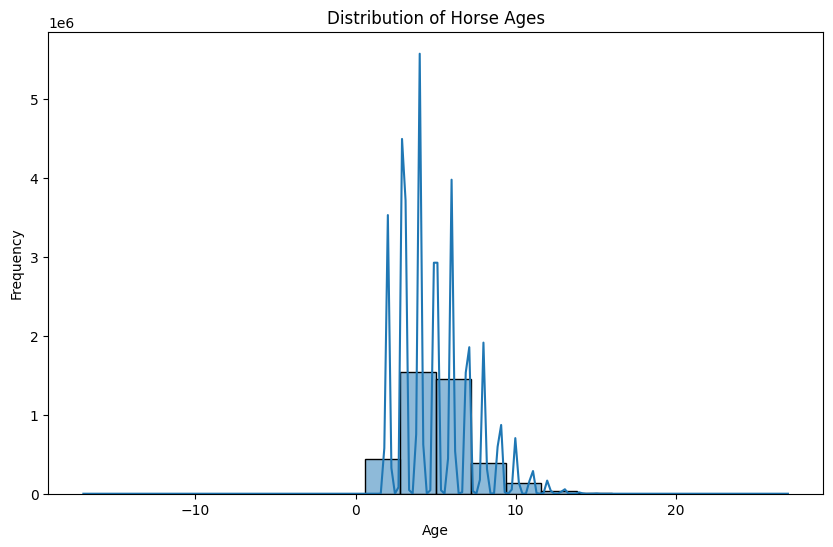

In [31]:
#Visualisation
#distribution of horse ages
plt.figure(figsize=(10,6))
sns.histplot(combined_df['age'],bins=20,kde=True)
plt.title('Distribution of Horse Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

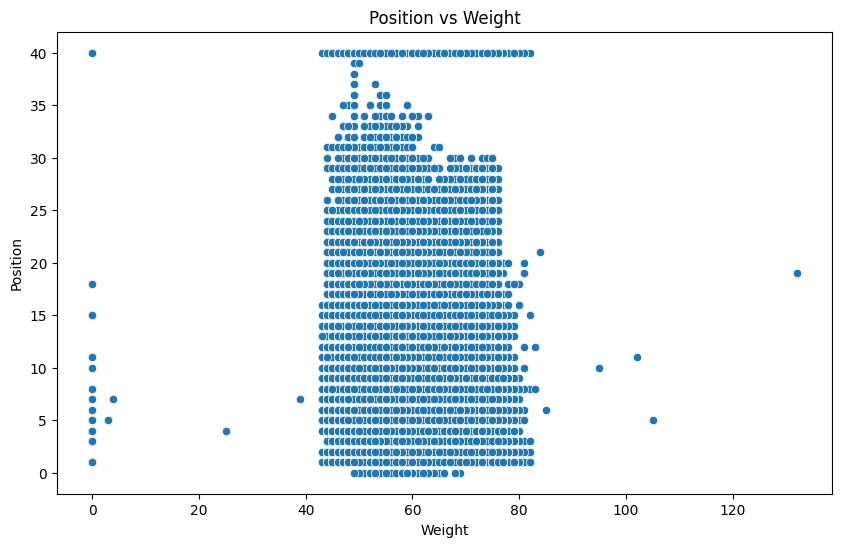

In [32]:
#scatterplot:position vs weight
plt.figure(figsize=(10,6))
sns.scatterplot(data=combined_df,x='weight',y='position')
plt.title('Position vs Weight')
plt.xlabel('Weight')
plt.ylabel('Position')
plt.show()

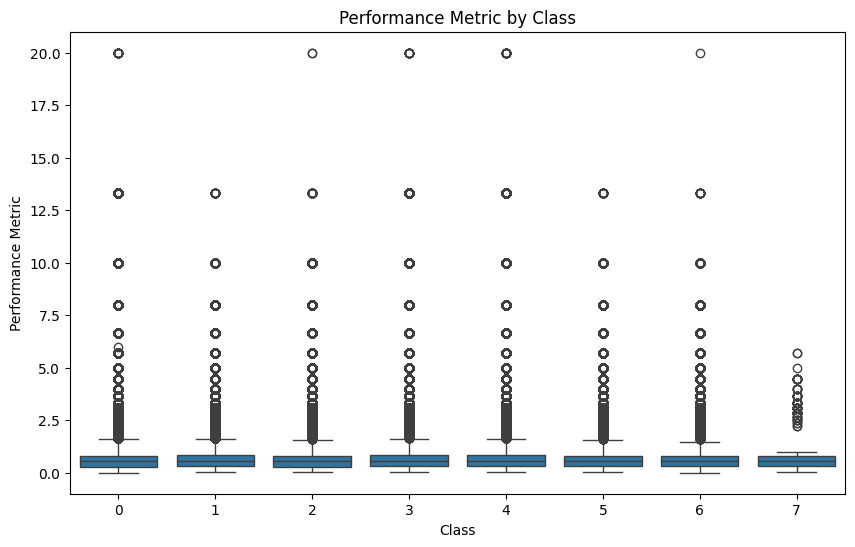

In [33]:
#box plot:distribution of performance_metric by class
plt.figure(figsize=(10,6))
sns.boxplot(data=combined_df,x='class',y='performance_metric')
plt.title('Performance Metric by Class')
plt.xlabel('Class')
plt.ylabel('Performance Metric')
plt.show()

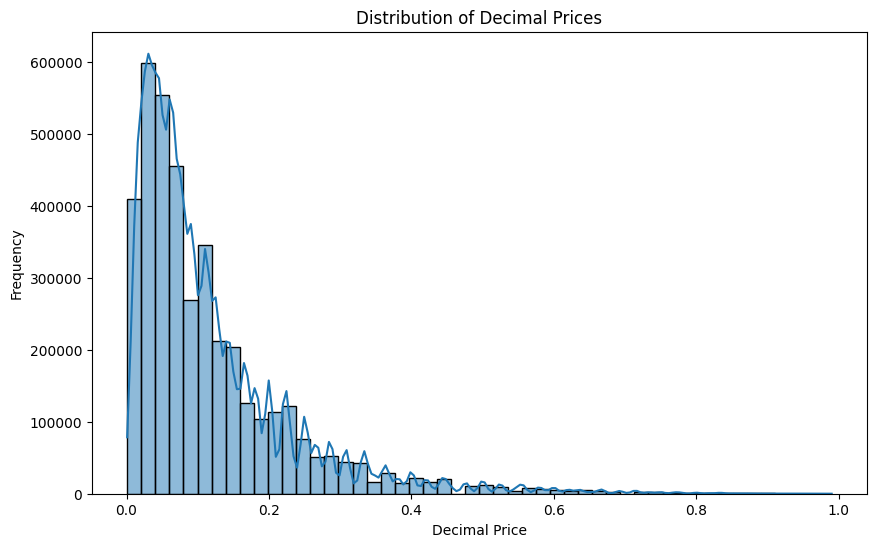

In [34]:
#Histogram:distribution of decimalPrice
plt.figure(figsize=(10,6))
sns.histplot(combined_df['decimalPrice'],bins=50,kde=True)
plt.title('Distribution of Decimal Prices')
plt.xlabel('Decimal Price')
plt.ylabel('Frequency')
plt.show()

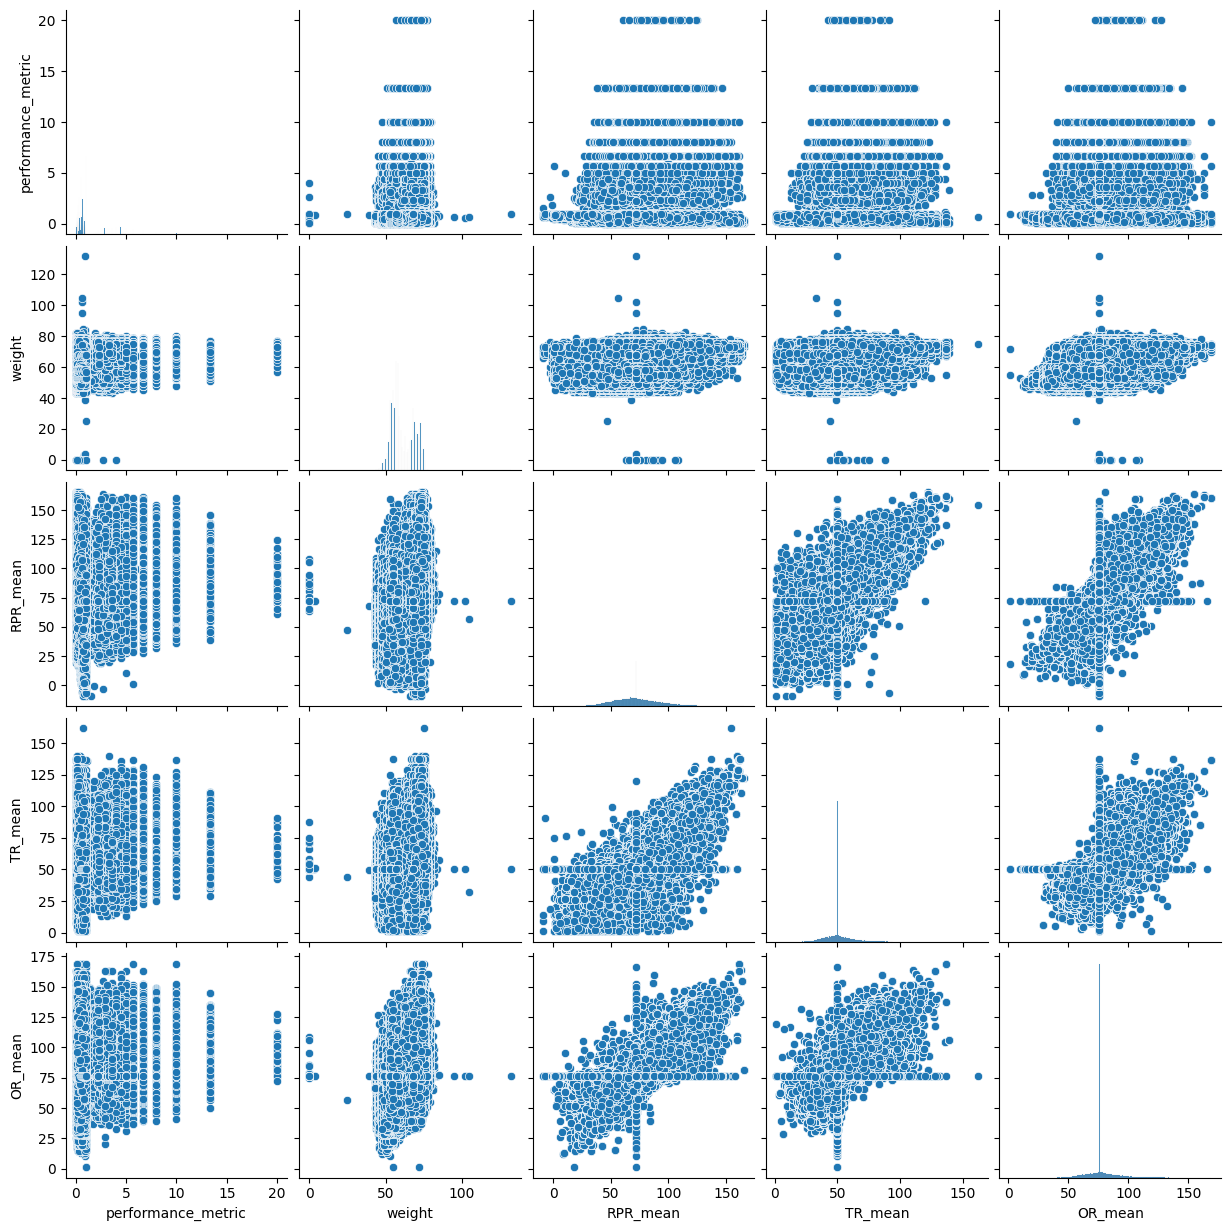

In [35]:
#Pairplot for a subset of features
sns.pairplot(combined_df[['performance_metric','weight','RPR_mean','TR_mean','OR_mean']])
plt.show()

In [36]:
combined_df.columns

Index(['rid', 'course', 'time', 'date', 'title', 'ages', 'distance',
       'condition', 'prizes', 'winningTime', 'prize', 'metric', 'countryCode',
       'ncond', 'class', 'horseName', 'age', 'saddle', 'decimalPrice', 'isFav',
       'trainerName', 'jockeyName', 'position', 'positionL', 'dist',
       'weightSt', 'weightLb', 'RPR', 'TR', 'OR', 'father', 'mother',
       'gfather', 'runners', 'margin', 'weight', 'res_win', 'res_place',
       'performance_metric', 'avg_weight', 'num_races', 'lag_performance',
       'lag_weight', 'position_mean', 'position_std', 'weight_mean',
       'weight_std', 'decimalPrice_mean', 'decimalPrice_std', 'RPR_mean',
       'RPR_std', 'TR_mean', 'TR_std', 'OR_mean', 'OR_std'],
      dtype='object')

In [37]:
combined_df.dtypes

rid                     int64
course                 object
time                   object
date                   object
title                  object
ages                   object
distance               object
condition              object
prizes                 object
winningTime           float64
prize                 float64
metric                float64
countryCode            object
ncond                  object
class                   int64
horseName              object
age                   float64
saddle                float64
decimalPrice          float64
isFav                   int64
trainerName            object
jockeyName             object
position                int64
positionL              object
dist                   object
weightSt                int64
weightLb                int64
RPR                   float64
TR                    float64
OR                    float64
father                 object
mother                 object
gfather                object
runners   

In [38]:
#fill missing values


In [39]:
combined_df.isnull().sum().sum()

347934

In [40]:
combined_df.isnull().sum()

rid                       0
course                    0
time                      0
date                      0
title                     0
ages                      0
distance                  0
condition                 0
prizes                    0
winningTime               0
prize                     0
metric                    0
countryCode               0
ncond                     0
class                     0
horseName                 0
age                       0
saddle                    0
decimalPrice              0
isFav                     0
trainerName               0
jockeyName                0
position                  0
positionL                 0
dist                      0
weightSt                  0
weightLb                  0
RPR                       0
TR                        0
OR                        0
father                    0
mother                    0
gfather                   0
runners                   0
margin                    0
weight              

In [41]:
combined_df.dtypes

rid                     int64
course                 object
time                   object
date                   object
title                  object
ages                   object
distance               object
condition              object
prizes                 object
winningTime           float64
prize                 float64
metric                float64
countryCode            object
ncond                  object
class                   int64
horseName              object
age                   float64
saddle                float64
decimalPrice          float64
isFav                   int64
trainerName            object
jockeyName             object
position                int64
positionL              object
dist                   object
weightSt                int64
weightLb                int64
RPR                   float64
TR                    float64
OR                    float64
father                 object
mother                 object
gfather                object
runners   

In [42]:
combined_df['position_std'].value_counts()

position_std
0.000000     12491
1.414214     12049
0.707107     11745
2.121320      9602
2.828427      9232
             ...  
19.553346        3
13.203535        3
6.506407         3
2.081666         3
21.166010        3
Name: count, Length: 110937, dtype: int64

In [43]:
# Identify columns with missing values
columns_with_nan = combined_df.columns[combined_df.isnull().any()]

# Filter only numerical columns with missing values
numerical_columns_with_nan = combined_df[columns_with_nan].select_dtypes(include=['float64', 'int64']).columns

# Fill numerical columns with the mean value
for col in numerical_columns_with_nan:
    combined_df[col] = combined_df[col].fillna(combined_df[col].mean())

In [44]:
combined_df.isnull().sum().sum()

0

In [45]:
combined_df2=combined_df.copy()

In [46]:
combined_df.columns

Index(['rid', 'course', 'time', 'date', 'title', 'ages', 'distance',
       'condition', 'prizes', 'winningTime', 'prize', 'metric', 'countryCode',
       'ncond', 'class', 'horseName', 'age', 'saddle', 'decimalPrice', 'isFav',
       'trainerName', 'jockeyName', 'position', 'positionL', 'dist',
       'weightSt', 'weightLb', 'RPR', 'TR', 'OR', 'father', 'mother',
       'gfather', 'runners', 'margin', 'weight', 'res_win', 'res_place',
       'performance_metric', 'avg_weight', 'num_races', 'lag_performance',
       'lag_weight', 'position_mean', 'position_std', 'weight_mean',
       'weight_std', 'decimalPrice_mean', 'decimalPrice_std', 'RPR_mean',
       'RPR_std', 'TR_mean', 'TR_std', 'OR_mean', 'OR_std'],
      dtype='object')

In [47]:
#drop unnecessary columns
combined_df.drop(['metric','weightSt','avg_weight'],axis=1,inplace=True)



In [48]:
combined_df.columns

Index(['rid', 'course', 'time', 'date', 'title', 'ages', 'distance',
       'condition', 'prizes', 'winningTime', 'prize', 'countryCode', 'ncond',
       'class', 'horseName', 'age', 'saddle', 'decimalPrice', 'isFav',
       'trainerName', 'jockeyName', 'position', 'positionL', 'dist',
       'weightLb', 'RPR', 'TR', 'OR', 'father', 'mother', 'gfather', 'runners',
       'margin', 'weight', 'res_win', 'res_place', 'performance_metric',
       'num_races', 'lag_performance', 'lag_weight', 'position_mean',
       'position_std', 'weight_mean', 'weight_std', 'decimalPrice_mean',
       'decimalPrice_std', 'RPR_mean', 'RPR_std', 'TR_mean', 'TR_std',
       'OR_mean', 'OR_std'],
      dtype='object')

In [49]:
#MemoryError: Unable to allocate 30.4 MiB for an array with 
# shape (3987941,) and data type uint64


In [50]:
#taking smaller sample of dataset
sample_size=5000
combined_df_sample=combined_df.sample(n=sample_size,random_state=42)

In [51]:
combined_df_sample['res_win'].value_counts()

res_win
0.0    4512
1.0     488
Name: count, dtype: int64

In [52]:
combined_df_sample['res_win'].dtype

dtype('float64')

In [53]:
#normalize relevant numerical columns
numerical_columns1=combined_df_sample.select_dtypes(include=['float64','int64']).columns
scaler=StandardScaler()
combined_df_sample[numerical_columns1]=scaler.fit_transform(combined_df_sample[numerical_columns1])

In [54]:
combined_df_sample['res_win'].value_counts()

res_win
-0.328871    4512
 3.040707     488
Name: count, dtype: int64

In [55]:
#encode categoriccal variables
categorical_columns=combined_df_sample.select_dtypes(include=['object']).columns
combined_df_sample=pd.get_dummies(combined_df_sample,columns=categorical_columns)

In [56]:
combined_df_sample.columns

Index(['rid', 'winningTime', 'prize', 'class', 'age', 'saddle', 'decimalPrice',
       'isFav', 'position', 'weightLb',
       ...
       'gfather_Young Generation', 'gfather_Yrrah Jr', 'gfather_Zabeel',
       'gfather_Zaffaran', 'gfather_Zafonic', 'gfather_Zamindar',
       'gfather_Zero Problemo', 'gfather_Zieten', 'gfather_Zilzal',
       'gfather_Zulu'],
      dtype='object', length=29143)

In [57]:
#split the data
threshold=1
X=combined_df_sample.drop(columns=['res_win','res_place'])
y=(combined_df_sample['res_win']>1).astype(int)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [58]:
y.value_counts()

res_win
0    4512
1     488
Name: count, dtype: int64

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score


In [60]:
def plot_confusion_matrix(y_true,y_pred,title):
    cm=confusion_matrix(y_true,y_pred)
    disp=ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

In [61]:
#Logistic Regression
logreg=LogisticRegression(max_iter=1000,class_weight='balanced')
logreg.fit(X_train,y_train)
y_pred_logreg=logreg.predict(X_test)

Logistic Regression Accuracy: 1.0
Logistic Regression F1 Score: 1.0
Logistic Regression ROC AUC Score: 1.0


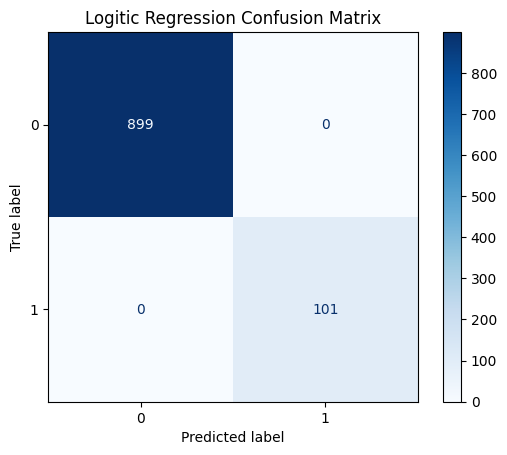

In [62]:
print("Logistic Regression Accuracy:",accuracy_score(y_test,y_pred_logreg))
print("Logistic Regression F1 Score:",f1_score(y_test,y_pred_logreg))
print("Logistic Regression ROC AUC Score:",roc_auc_score(y_test,y_pred_logreg))

#plot confusion matrix
plot_confusion_matrix(y_test,y_pred_logreg,"Logitic Regression Confusion Matrix")

In [63]:
from sklearn.model_selection import cross_val_score

# perform cross-validation
cv_scores=cross_val_score(logreg,X_test,y_test,cv=5,scoring='accuracy')

print("Cross-Validation Accuracy Scores:",cv_scores)
print("Mean Cross-Validation Accuracy:",cv_scores.mean())
print("Standard Deviation of Cross-Validation Accuracy:",cv_scores.std())

Cross-Validation Accuracy Scores: [0.995 1.    1.    0.995 1.   ]
Mean Cross-Validation Accuracy: 0.998
Standard Deviation of Cross-Validation Accuracy: 0.00244948974278318


random Forest Accuracy: 0.988
Random Forest F1 Score: 0.9368421052631579
Random Forest ROC AUC Score: 0.9405940594059405


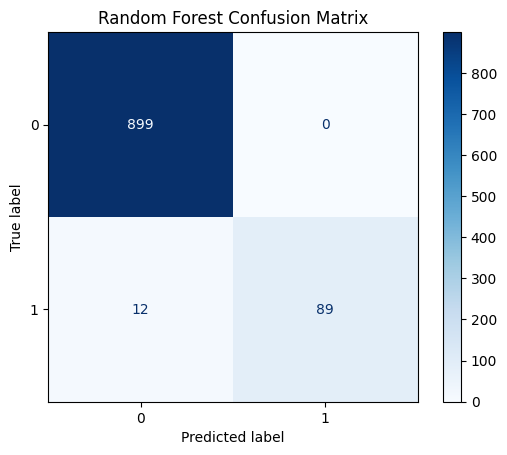

In [64]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(class_weight='balanced',random_state=42)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)

#evaluate the model
print("random Forest Accuracy:",accuracy_score(y_test,y_pred_rf))
print("Random Forest F1 Score:",f1_score(y_test,y_pred_rf))
print("Random Forest ROC AUC Score:",roc_auc_score(y_test,y_pred_rf))

#plot confusion matrix
plot_confusion_matrix(y_test,y_pred_rf,"Random Forest Confusion Matrix")

In [65]:
from sklearn.model_selection import cross_val_score

# perform cross-validation
cv_scores=cross_val_score(rf,X_test,y_test,cv=5,scoring='accuracy')

print("Cross-Validation Accuracy Scores:",cv_scores)
print("Mean Cross-Validation Accuracy:",cv_scores.mean())
print("Standard Deviation of Cross-Validation Accuracy:",cv_scores.std())

Cross-Validation Accuracy Scores: [0.925 0.925 0.92  0.92  0.905]
Mean Cross-Validation Accuracy: 0.9189999999999999
Standard Deviation of Cross-Validation Accuracy: 0.007348469228349541


Gradient Boosting Accuracy: 1.0
Gradient Boosting F1 Score: 1.0
Gradient Boosting ROC AUC Score: 1.0


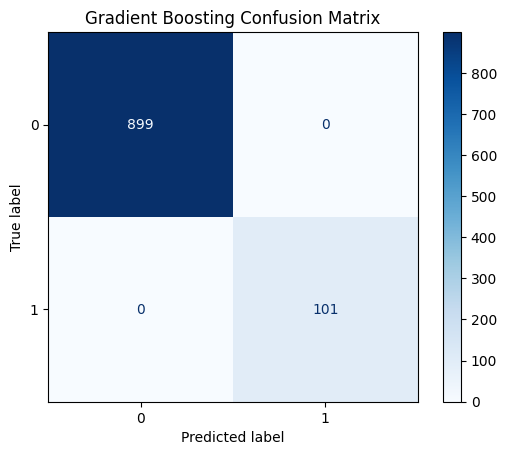

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
#gradient boosting
gb=GradientBoostingClassifier(random_state=42)
gb.fit(X_train,y_train)
y_pred_gb=gb.predict(X_test)

#evaluate the model
print("Gradient Boosting Accuracy:",accuracy_score(y_test,y_pred_gb))
print("Gradient Boosting F1 Score:",f1_score(y_test,y_pred_gb))
print("Gradient Boosting ROC AUC Score:",roc_auc_score(y_test,y_pred_gb))

#plot confusion matrix
plot_confusion_matrix(y_test,y_pred_gb,"Gradient Boosting Confusion Matrix")

In [67]:
from sklearn.model_selection import cross_val_score

# perform cross-validation
cv_scores=cross_val_score(gb,X_test,y_test,cv=5,scoring='accuracy')

print("Cross-Validation Accuracy Scores:",cv_scores)
print("Mean Cross-Validation Accuracy:",cv_scores.mean())
print("Standard Deviation of Cross-Validation Accuracy:",cv_scores.std())

Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Accuracy: 1.0
Standard Deviation of Cross-Validation Accuracy: 0.0


Neural Netwrks Accuracy: 0.996
Neural Networks F1 Score: 0.9801980198019802
Neural Networks ROC AUC Score: 0.9889866628487098


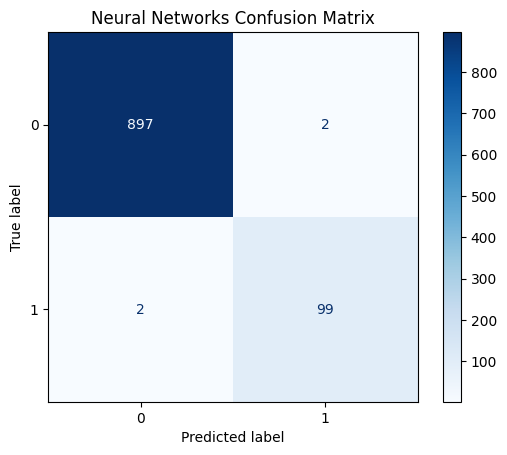

In [68]:
from sklearn.neural_network import MLPClassifier

#neural Networks
mlp=MLPClassifier(max_iter=1000,random_state=42)
mlp.fit(X_train,y_train)
y_pred_mlp=mlp.predict(X_test)

#evaluate the model
print("Neural Netwrks Accuracy:",accuracy_score(y_test,y_pred_mlp))
print("Neural Networks F1 Score:",f1_score(y_test,y_pred_mlp))
print("Neural Networks ROC AUC Score:", roc_auc_score(y_test,y_pred_mlp))


#plot confusion matrix
plot_confusion_matrix(y_test,y_pred_mlp,"Neural Networks Confusion Matrix")

In [69]:
from sklearn.model_selection import cross_val_score

# perform cross-validation
cv_scores=cross_val_score(mlp,X_test,y_test,cv=5,scoring='accuracy')

print("Cross-Validation Accuracy Scores:",cv_scores)
print("Mean Cross-Validation Accuracy:",cv_scores.mean())
print("Standard Deviation of Cross-Validation Accuracy:",cv_scores.std())

Cross-Validation Accuracy Scores: [0.945 0.95  0.975 0.945 0.94 ]
Mean Cross-Validation Accuracy: 0.951
Standard Deviation of Cross-Validation Accuracy: 0.012409673645990868


In [70]:
from imblearn.over_sampling import SMOTE

#apply SMOTE to the training data
smote=SMOTE(random_state=42)
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)

RFC with SMOTE Accuracy: 0.988
RFC with SMOTE F! Score: 0.9368421052631579
RFC with SMOTE ROC AUC Score: 0.9405940594059405


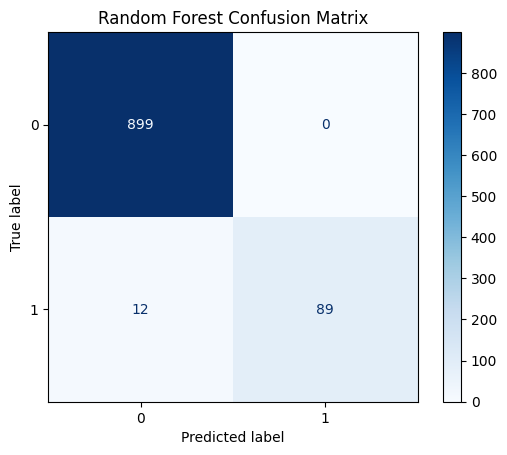

In [71]:
#fit and evaluate models again with SMOTE
rf_smote=RandomForestClassifier(class_weight='balanced',random_state=42)
rf_smote.fit(X_train,y_train)
y_pred_rf_smote=rf_smote.predict(X_test)

print("RFC with SMOTE Accuracy:",accuracy_score(y_test,y_pred_rf_smote))
print("RFC with SMOTE F! Score:",f1_score(y_test,y_pred_rf_smote))
print("RFC with SMOTE ROC AUC Score:",roc_auc_score(y_test,y_pred_rf_smote))


#plot confusion matrix
plot_confusion_matrix(y_test,y_pred_rf_smote,"Random Forest Confusion Matrix")

In [72]:
# no change in accuracy

In [ ]:
from sklearn.feature_selection import RFE

#rfe with Logistic Regression
rfe=RFE(estimator=logreg,n_features_to_select=10)
rfe.fit(X_train,y_train)
y_pred_rfe=rfe.predict(X_test)

print("RFE Accuracy:",accuracy_score(y_test,y_pred_rfe))
print("RFE F! Score:",f1_score(y_test,y_pred_rfe))
print("RFE ROC AUC Score:",roc_auc_score(y_test,y_pred_rfe))

#MemoryError: Unable to allocate 889. MiB for an array with shape (4000, 29122) and data type float64


In [74]:
from sklearn.model_selection import GridSearchCV

#Grid Search for Random Forest
param_grid={
    'n_estimators':[100,200],
    'max_depth':[10,20],
    'min_samples_split':[2,5]
}

grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,scoring='f1')
grid_search.fit(X_train,y_train)
best_rf=grid_search.best_estimator_
y_pred_best_rf=best_rf.predict(X_test)

print("Best Random Forest Accuracy:",accuracy_score(y_test,y_pred_best_rf))
print("Best Random Forest F1 Score:",f1_score(y_test,y_pred_best_rf))
print("Best Random Forest ROC AUC Score:",roc_auc_score(y_test,y_pred_best_rf))

Best Random Forest Accuracy: 0.996
Best Random Forest F1 Score: 0.9803921568627451
Best Random Forest ROC AUC Score: 0.9933809843720746


In [75]:
print("Selected Parameters:",grid_search.best_params_)

Selected Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
#Use rfc because of lower overfitting

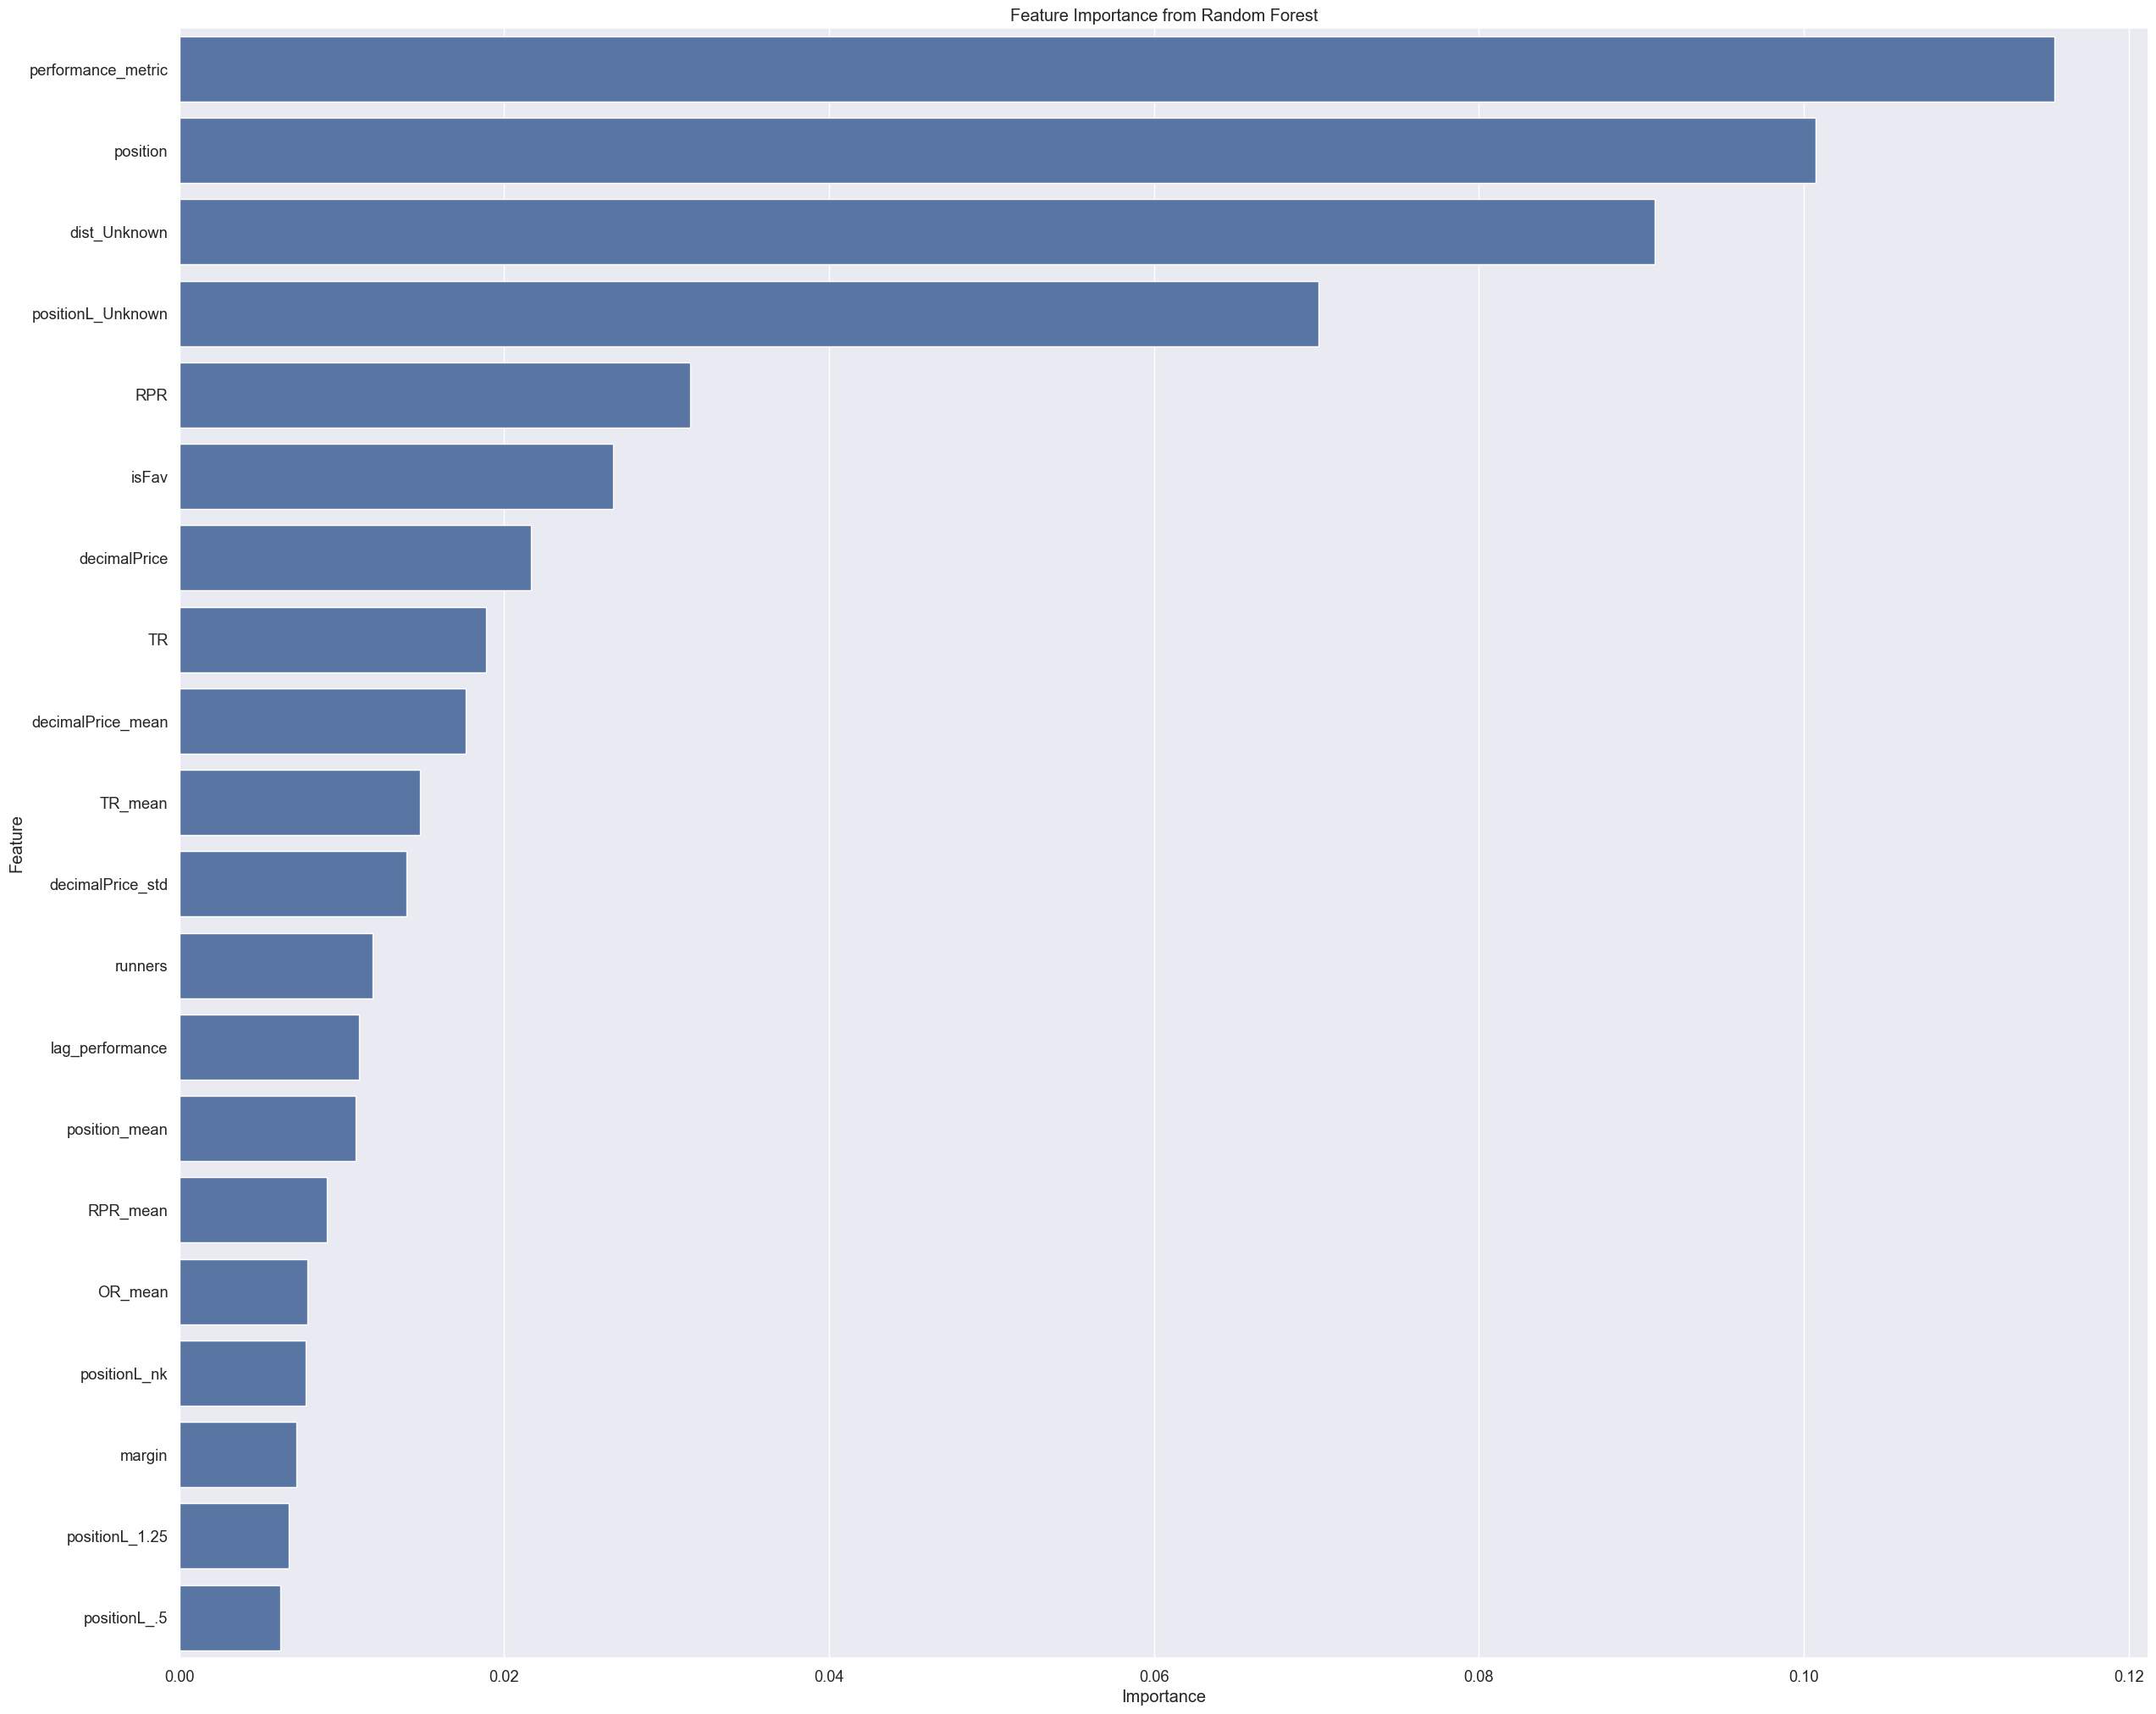

In [77]:
#feature importance from Random Forest
feature_importances=best_rf.feature_importances_
features=X_train.columns

#Create a DataFrame for better visualisation
feature_importance_df=pd.DataFrame({'Feature':features,'Importance':feature_importances})
feature_importance_df=feature_importance_df.sort_values(by='Importance',ascending=False)

# plotting feature importance
plt.figure(figsize=(30,25))
sns.set(font_scale=1.2)

#plot the top 20 most important features
top_n=20
feature_importance_df_top_n=feature_importance_df.head(top_n)

#plotting feature importance
sns.barplot(x='Importance',y='Feature',data=feature_importance_df_top_n)
plt.title('Feature Importance from Random Forest')
plt.show()

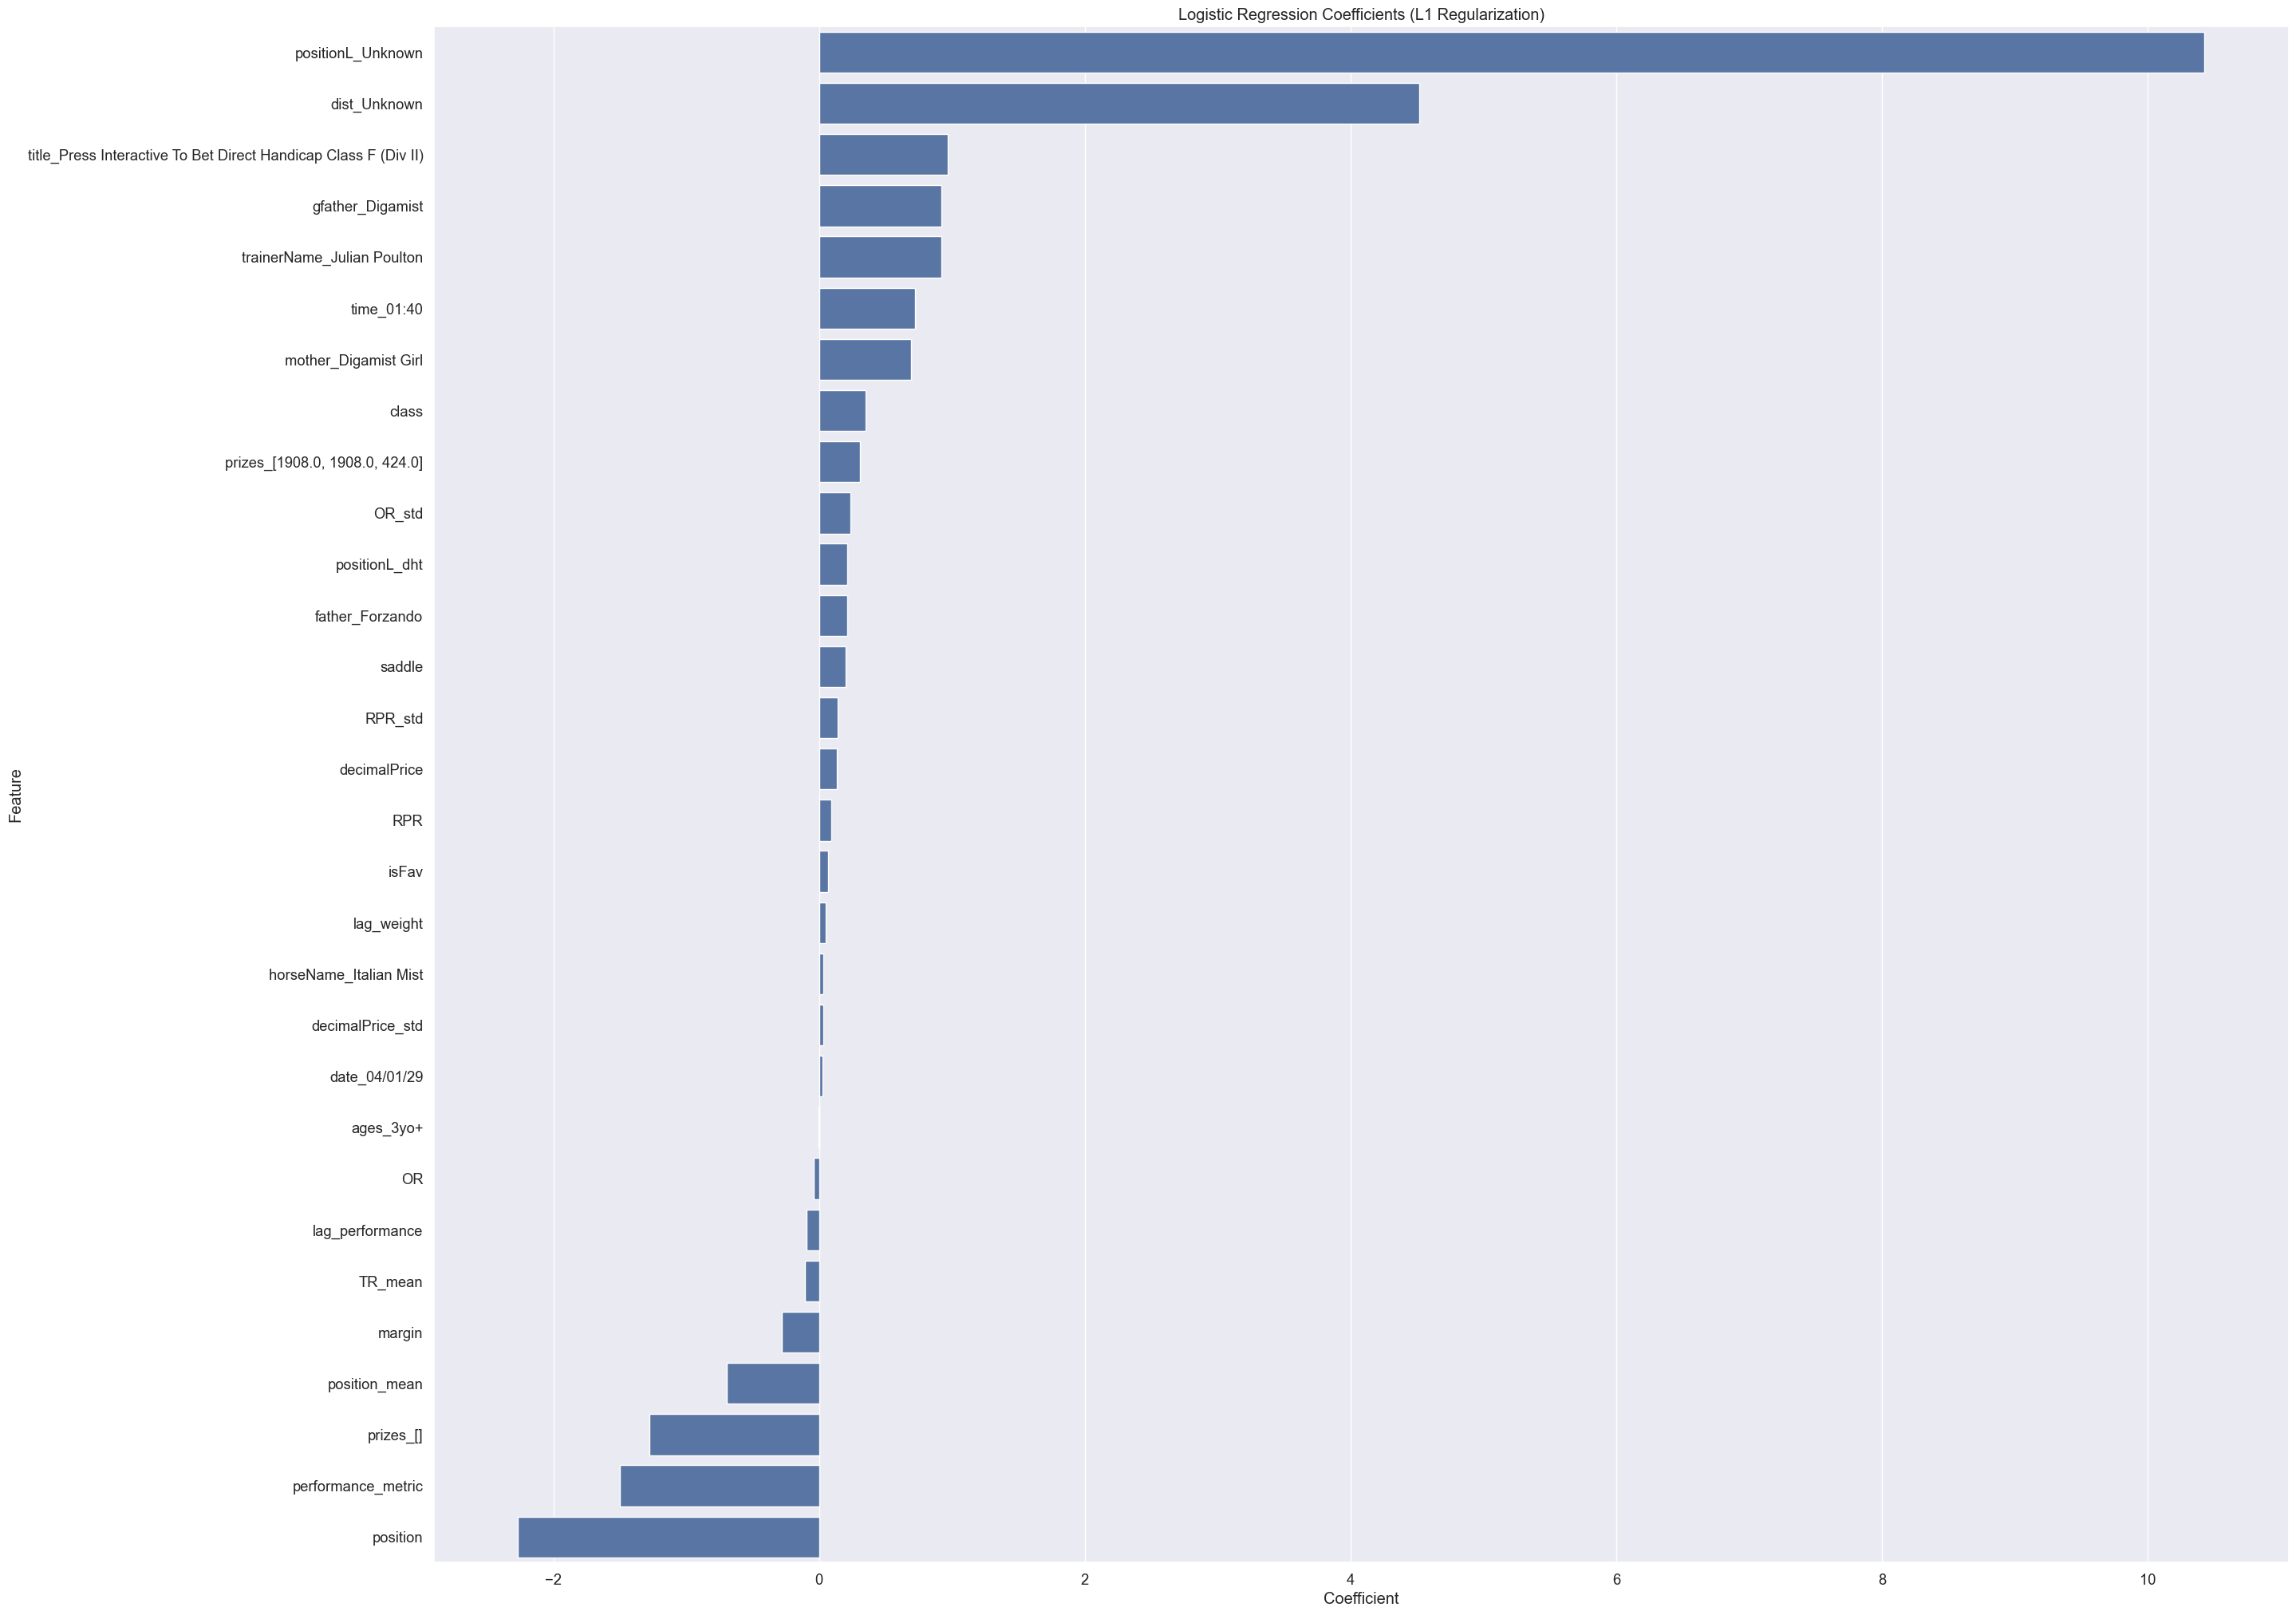

In [81]:
#logistic regression with L1 regularisation
logreg_l1=LogisticRegression(penalty='l1',solver='liblinear',max_iter=1000,class_weight='balanced')
logreg_l1.fit(X_train,y_train)

#get coefficients
coefficients=logreg_l1.coef_[0]
features=X_train.columns

#create a dataframe for better visualisation
coefficients_df=pd.DataFrame({'Feature':features,'Coefficient':coefficients})
coefficients_df=coefficients_df[coefficients_df['Coefficient']!=0]#Filter out zero coefficients
coefficients_df=coefficients_df.sort_values(by='Coefficient',ascending=False)

#plotting coefficients
plt.figure(figsize=(30,25))
sns.set(font_scale=1.2)
sns.barplot(x='Coefficient',y='Feature',data=coefficients_df)
plt.title('Logistic Regression Coefficients (L1 Regularization)')
plt.show()

Positive Coefficient: Indicates a positive relationship between the feature and the target variable. As the value of the feature increases, the target variable also increases.
Negative Coefficient: Indicates a negative relationship between the feature and the target variable. As the value of the feature increases, the target variable decreases.


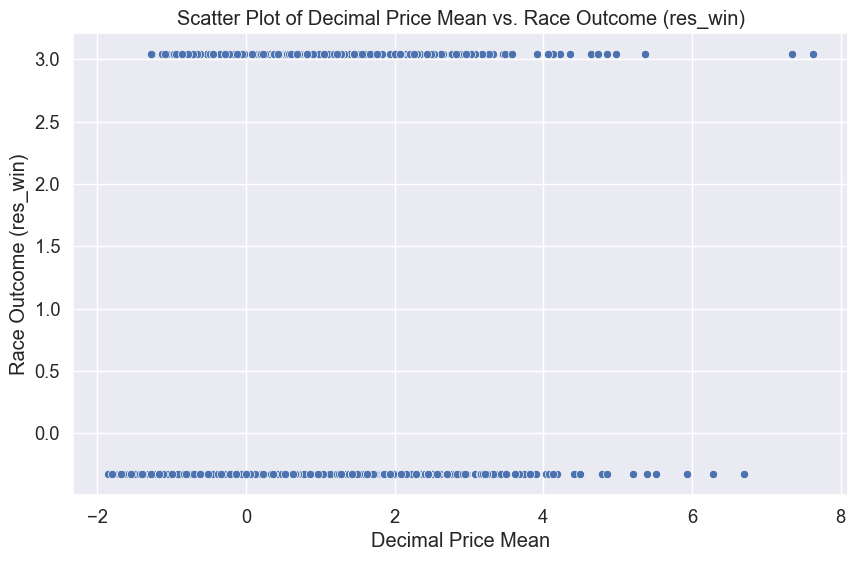

In [87]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='decimalPrice_mean', y='res_win', data=combined_df_sample)
plt.title('Scatter Plot of Decimal Price Mean vs. Race Outcome (res_win)')
plt.xlabel('Decimal Price Mean')
plt.ylabel('Race Outcome (res_win)')
plt.show()

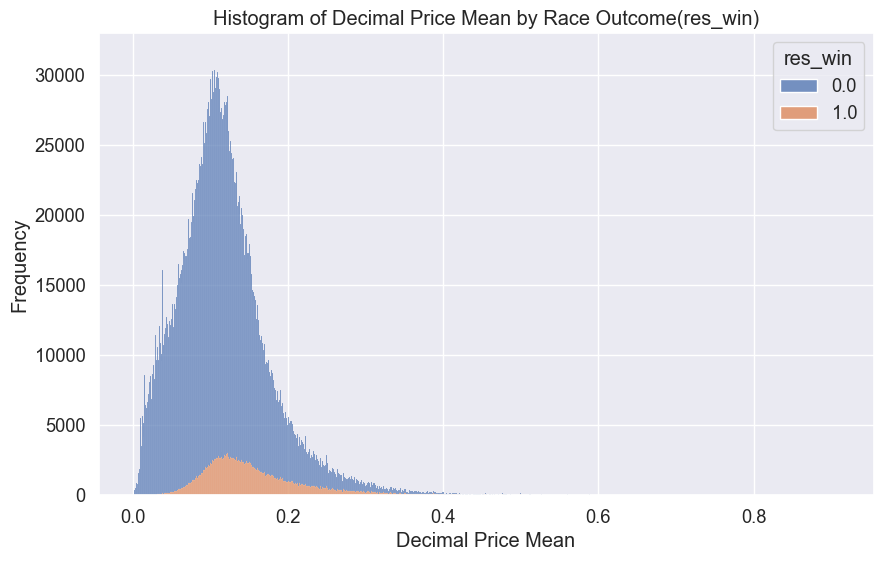

In [90]:
#histogram
plt.figure(figsize=(10,6))
sns.histplot(data=combined_df,x='decimalPrice_mean',hue='res_win',multiple='stack')
plt.title('Histogram of Decimal Price Mean by Race Outcome(res_win)')
plt.xlabel('Decimal Price Mean')
plt.ylabel('Frequency')
plt.show()

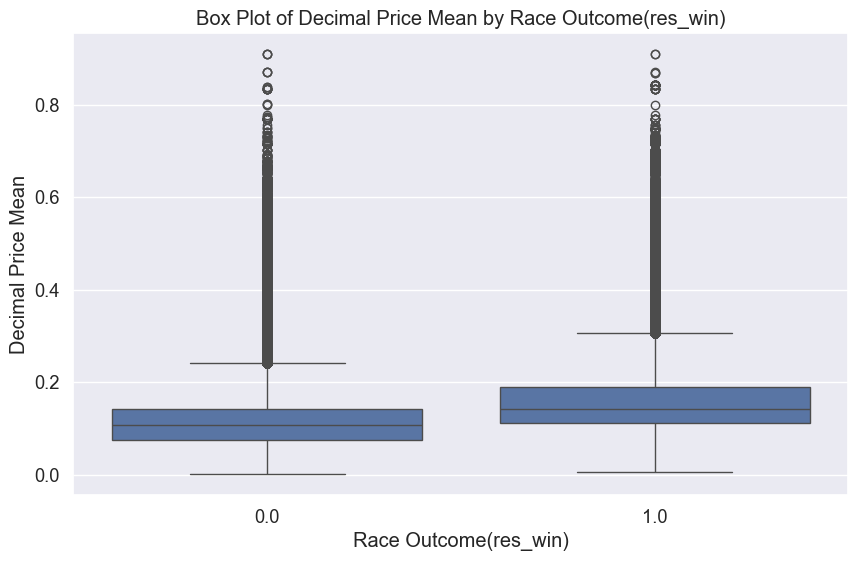

In [91]:
#box plot
plt.figure(figsize=(10,6))
sns.boxplot(x='res_win',y='decimalPrice_mean',data=combined_df)
plt.title('Box Plot of Decimal Price Mean by Race Outcome(res_win)')
plt.xlabel('Race Outcome(res_win)')
plt.ylabel('Decimal Price Mean')
plt.show()

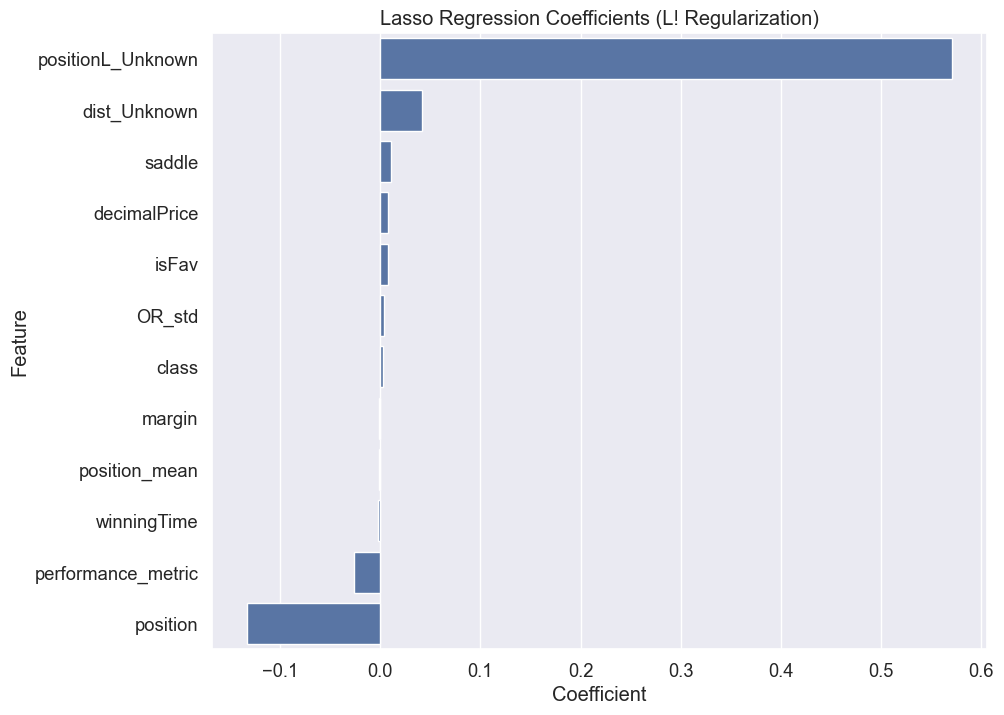

In [92]:
from sklearn.linear_model import Lasso,Ridge

#Lasso Regression
lasso=Lasso(alpha=0.01,max_iter=1000)
lasso.fit(X_train,y_train)
lasso_coefficients=pd.DataFrame({'Feature':X_train.columns,'Coefficient':lasso.coef_})
lasso_coefficients=lasso_coefficients[lasso_coefficients['Coefficient']!=0]
lasso_coefficients=lasso_coefficients.sort_values(by='Coefficient',ascending=False)

#plot
plt.figure(figsize=(10,8))
sns.barplot(x='Coefficient',y='Feature',data=lasso_coefficients)
plt.title('Lasso Regression Coefficients (L! Regularization)')
plt.show()